### Imports

In [3]:
import glob
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
from PIL import Image
from sklearn.utils import shuffle
from tensorflow import keras
import tensorflow as tf

print(tf.__version__)

1.8.0


In [4]:
def display_images(ax, images, labels, classes, num_images):
    ''' Display selected images.
    
    Paramters:
        ax (matplotlib.figure.Figure): figure to display images.
        images (list(nump.ndarray)): 300 x 512 x 512 x 3.
        lables (list(numpy.int32)): 300 x 1.
        classes (list(str)): 3 x 1.
        num_images (int): number of images to display in a square subplot layout.
    
    Returns:
        NA: figure
        
    '''
    
    for i in range(0, num_images):
        plt.subplot(np.sqrt(num_images).astype(int), np.sqrt(num_images).astype(int), i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(classes[labels[i]])

### Load Images and Labels

In [5]:
data_dir = os.getcwd() + '\data'
classes = os.listdir(data_dir)

images = np.empty((0, 512, 512, 3), dtype=np.uint8)
labels = np.empty((0,), dtype=np.uint8)

for i in range(0, len(classes)):
    print(str(i)+'/'+str(len(classes)))
    print('Class ' + str(i) + ': ' + classes[i])
    
    class_dir = data_dir + '\\' + classes[i]
    print('Loading images from:', class_dir)
    imgs = glob.glob(class_dir+'/*.png')

    imgs = np.array([np.array(Image.open(img)) for img in imgs])
    imgs = imgs.astype(int)
    
    images = np.append(images, imgs, axis=0)
    labels = np.append(labels, (i*np.ones((imgs.shape[0],))).astype(int), axis=0)

print()
print('Images:', images.shape)
print('Labels:', labels.shape)

0/3
Class 0: Necrosis
Loading images from: C:\Users\alexa\Documents\GitHub\TCGA-kidney\data\Necrosis
1/3
Class 1: Stroma
Loading images from: C:\Users\alexa\Documents\GitHub\TCGA-kidney\data\Stroma
2/3
Class 2: Tumor
Loading images from: C:\Users\alexa\Documents\GitHub\TCGA-kidney\data\Tumor

Images: (300, 512, 512, 3)
Labels: (300,)


Text(0.5,0,'Necrosis')

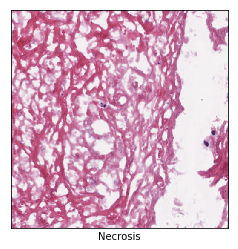

In [6]:
#display single image

plt.figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(images[0])
plt.xlabel(classes[labels[0]])

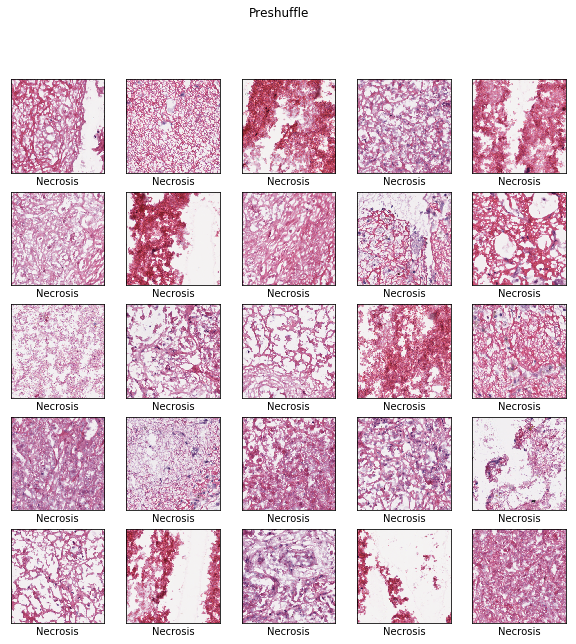

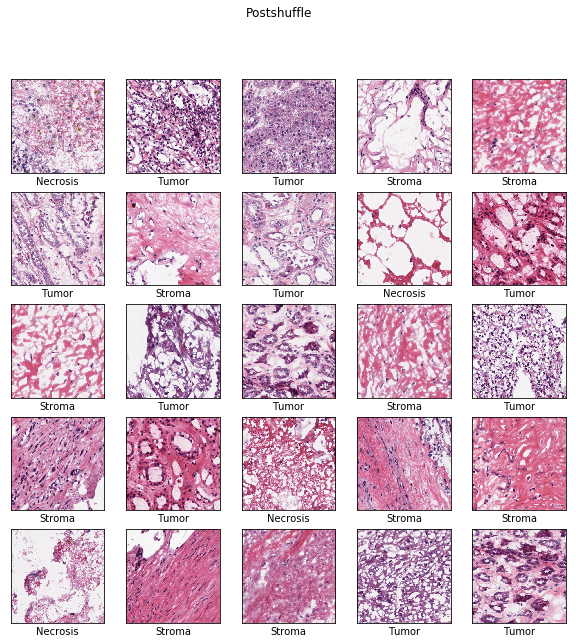

In [8]:
#randomize order of images

ax = plt.figure(figsize=(10, 10))
plt.suptitle('Preshuffle')
display_images(ax, images, labels, classes, 25)

images, labels = shuffle(images, labels)

ax = plt.figure(figsize=(10, 10))
plt.suptitle('Postshuffle')
display_images(ax, images, labels, classes, 25)

In [9]:
print(classes)

['Necrosis', 'Stroma', 'Tumor']


### Implement color normalization using Reinhard's Method

### Apply data augmentation: random crop (224x224), flip, rotation